In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import sweetviz as sv

# Load the data

In [88]:
year = 2016
df = pd.read_csv(f"dataset/full_{year}.csv")

/home/siewe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (10,12,14,16,17,18,20,22,24,26,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df[:200000].to_csv(f"dataset/min_{year}.csv")

# Data preprocessing

In [4]:
df.shape

(200000, 41)

In [5]:
df.head()

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323540,46.171919
1,1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893436,46.251868
2,2,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,BOIS DU CHAMP RION,B006,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.899919,46.235327
3,3,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,EN COROBERT,B025,...,NaN,NaN,NaN,T,terres,NaN,NaN,1940.0,4.882347,46.246519
4,4,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,...,NaN,NaN,NaN,T,terres,NaN,NaN,1148.0,4.894688,46.251820


In [6]:
df.nature_culture_speciale.value_counts()

Jardin potager                            1151
Pâture plantée                             923
Oliveraie ou oliviers                      609
Châtaigneraie                              539
Friche                                     531
Pins                                       444
Terrain vague                              398
Sapins ou sapinière                        338
Vins d'appellation d'origine contrôlée     270
Chemin (non groupe)                        252
Parc                                       167
Etangs                                     163
Pré marais                                 142
Rue                                        133
Chênes                                     130
Jardin d'agrément                          130
Acacias                                     71
Jardin maraîcher non aménagé                69
Jardin floral                               60
Mare                                        52
Canal                                       47
Terrain de sp

In [7]:
df.adresse_code_voie=df.adresse_code_voie.astype(str)
df.code_commune=df.code_commune.astype(str)
df.code_departement=df.code_departement.astype(str)
df.numero_volume=df.numero_volume.astype(str)
df.lot1_numero=df.lot1_numero.astype(str)
df.lot2_numero=df.lot2_numero.astype(str)
df.lot3_numero=df.lot3_numero.astype(str)
df.lot4_numero=df.lot4_numero.astype(str)
df.lot5_numero=df.lot5_numero.astype(str)
df.date_mutation = pd.to_datetime(df.date_mutation)

In [8]:
df.index = df.date_mutation

In [9]:
m=12
i = df[["valeur_fonciere","latitude","longitude"]]
i = i.loc[f"2020-{m}",:]
i[~(i.latitude.isna() & i.longitude.isna())][["latitude","longitude"]]

,latitude,longitude
date_mutation,,
2020-12-02,46.349690,6.133268
2020-12-02,46.178537,5.738449
2020-12-07,45.803695,5.445676
2020-12-02,46.370306,6.150213
2020-12-02,46.370306,6.150213
...,...,...
2020-12-23,48.296395,4.075056
2020-12-11,48.491434,3.496267
2020-12-11,48.491434,3.496267


<AxesSubplot:xlabel='date_mutation'>

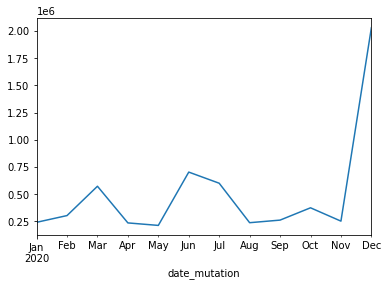

In [10]:
df.loc[:,"valeur_fonciere"].resample("M").mean().plot()

In [11]:
sv_report = sv.analyze(df)
sv_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
df.code_type_local.value_counts()

2.0    35120
1.0    34756
3.0    27623
4.0     6864
Name: code_type_local, dtype: int64

In [13]:
a=df.count()
a[a >= .8*df.shape[0]]

Unnamed: 0            200000
id_mutation           200000
date_mutation         200000
numero_disposition    200000
nature_mutation       200000
valeur_fonciere       198484
adresse_nom_voie      197830
adresse_code_voie     200000
code_postal           197833
code_commune          200000
nom_commune           200000
code_departement      200000
id_parcelle           200000
numero_volume         200000
lot1_numero           200000
lot2_numero           200000
lot3_numero           200000
lot4_numero           200000
lot5_numero           200000
nombre_lots           200000
longitude             194244
latitude              194244
dtype: int64

# Data Visualization

In [14]:
# Communes with the highest number of transactions
a = df[["id_mutation", "nom_commune"]].groupby("nom_commune").count()

In [15]:
a= a.sort_values(by="id_mutation", ascending=False)[:15]
a = pd.DataFrame({"nom_commune": a.index.values, "id_mutation": a.id_mutation.values})
a

,nom_commune,id_mutation
0,Nice,17756
1,Cannes,4335
2,Antibes,4169
3,Troyes,2167
4,Le Cannet,2063
5,Menton,2010
6,Grasse,1990
7,Cagnes-sur-Mer,1935
8,Saint-Quentin,1721
9,Charleville-Mézières,1668


In [16]:
a = df[["latitude","longitude"]]
a[~(a.latitude.isna() & a.longitude.isna())]

,latitude,longitude
date_mutation,,
2020-01-07,46.171919,5.323540
2020-01-02,46.251868,4.893436
2020-01-02,46.235327,4.899919
2020-01-02,46.246519,4.882347
2020-01-02,46.251820,4.894688
...,...,...
2020-04-01,43.320126,1.953207
2020-04-01,43.320126,1.953207
2020-04-01,43.320126,1.953207


# Performing cross analysis

In [17]:
data = df.loc[:,"valeur_fonciere"].resample("M").mean()
b = pd.DataFrame({"valeurs": data.values, "mois": data.index.month})
b

,valeurs,mois
0,2.415084e+05,1
1,3.034519e+05,2
2,5.730814e+05,3
3,2.359834e+05,4
4,2.129781e+05,5
5,7.033261e+05,6
6,6.009230e+05,7
7,2.379050e+05,8
8,2.617223e+05,9
9,3.749722e+05,10


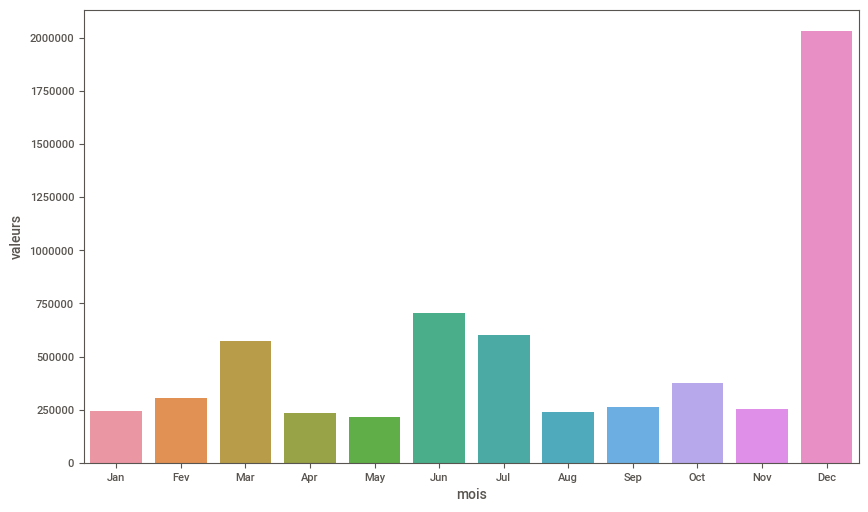

In [18]:
fig, ax= plt.subplots(figsize=(10,6))
ax = sns.barplot(data=b, x="mois", y="valeurs")
ax.set_xticklabels('Jan Fev Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split())
ax.set_xticks(np.arange(12))

In [19]:
df2017 = pd.read_csv("dataset/min_2017.csv")
df2018 = pd.read_csv("dataset/min_2018.csv")

/home/siewe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,17,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/siewe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,17,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
def preprocess(df_):
    df = df_.copy()
    df.adresse_code_voie=df.adresse_code_voie.astype(str)
    df.code_commune=df.code_commune.astype(str)
    df.code_departement=df.code_departement.astype(str)
    df.numero_volume=df.numero_volume.astype(str)
    df.lot1_numero=df.lot1_numero.astype(str)
    df.lot2_numero=df.lot2_numero.astype(str)
    df.lot3_numero=df.lot3_numero.astype(str)
    df.lot4_numero=df.lot4_numero.astype(str)
    df.lot5_numero=df.lot5_numero.astype(str)
    df.date_mutation=pd.to_datetime(df.date_mutation)
    df.index = df.date_mutation
    return df

def load_data(year):
    df = pd.read_csv(f"dataset/min_{year}.csv")
    return df

In [21]:
def cities_biggest_price_increase():
    years = []
    for i in range(4):
        years.append(preprocess(load_data(2020-i)))
    return pd.concat(years, axis=0)

In [22]:
a = cities_biggest_price_increase()

/tmp/ipykernel_5953/3652150241.py:4: DtypeWarning: Columns (18,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  years.append(preprocess(load_data(2020-i)))
/tmp/ipykernel_5953/3652150241.py:4: DtypeWarning: Columns (15,17,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  years.append(preprocess(load_data(2020-i)))
/tmp/ipykernel_5953/3652150241.py:4: DtypeWarning: Columns (15,17,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  years.append(preprocess(load_data(2020-i)))


In [23]:
a = a[["code_departement", "valeur_fonciere"]].groupby("code_departement").max()-a[["code_departement", "valeur_fonciere"]].groupby("code_departement").min()
a["code"] = a.index

In [24]:
b = df[df.nom_commune == "Erp"].type_local.value_counts()


In [70]:
b[b.nom_commune == "Nice"].type_local.value_counts()

Dépendance    7
Name: type_local, dtype: int64

In [36]:
#df["prix/m^2"] = df.valeur_fonciere/df.surface_terrain
slider_data = (df.surface_terrain.min(),df.surface_terrain.max())
type_local = df.type_local.value_counts().index

In [86]:
b = df[df.type_local == "Dépendance"]
b = b[(b.surface_terrain >= 19237.95) & (b.surface_terrain <= 35268.74) & ~(b["prix/m^2"].isna())]
c = b[["nom_commune","prix/m^2"]].groupby("nom_commune").mean().sort_values(by="prix/m^2", ascending=True)[:15]
c["nom_commune"] = c.index
c
#sns.barplot(data=c, x="nom_commune", y="prix/m^2")

,prix/m^2,nom_commune
nom_commune,,
Houldizy,0.479693,Houldizy
Laval-en-Laonnois,2.051048,Laval-en-Laonnois
Cosne-d'Allier,2.264288,Cosne-d'Allier
Courmes,13.295194,Courmes
Le Fossat,18.539646,Le Fossat
Saint-André-sur-Vieux-Jonc,23.229883,Saint-André-sur-Vieux-Jonc
Chappes,27.571267,Chappes
Pierrevert,31.747488,Pierrevert
La Colle-sur-Loup,108.080066,La Colle-sur-Loup


In [78]:
sns.barplot?

Signature:
sns.barplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x7f742818d5e0>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or more catego